In [4]:
!pip install plotly

  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [5]:
# Initial imports
import pandas as pd
#import hvplot.pandas
import numpy as np
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
# Load the crypto_data.csv dataset.
file_path = "Resources/cardio_train.csv"
cardio_df = pd.read_csv(file_path, sep=',',index_col=0)
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [8]:
# Remove rows that have at least 1 null value.
cardio_df = cardio_df.dropna()
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [9]:
# Getting Cardio Info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [10]:
cardio_df["age"]= cardio_df["age"].div(365).round()
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1


In [11]:
# Analyzing the DF with describe()
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Removing Outliers From the Data
cardio_df.drop(cardio_df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)
cardio_df.drop(cardio_df[(cardio_df['height'] > cardio_df['height'].quantile(0.975)) | (cardio_df['height'] < cardio_df['height'].quantile(0.025))].index,inplace=True)
cardio_df.drop(cardio_df[(cardio_df['weight'] > cardio_df['weight'].quantile(0.975)) | (cardio_df['weight'] < cardio_df['weight'].quantile(0.025))].index,inplace=True)

In [13]:
# Insert Body Mass Index (BMI) Column
cardio_df.insert(6, 'bmi', round((cardio_df['weight']/(cardio_df['height']/100)**2), 2))
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,21.97,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,34.93,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,23.51,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,28.71,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,23.01,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,54.0,1,172,70.0,130,90,23.66,1,1,0,0,1,1
99992,58.0,1,165,80.0,150,80,29.38,1,1,0,0,1,1
99993,53.0,2,168,76.0,120,80,26.93,1,1,1,0,1,0


In [14]:
# transforming our DF into X
X = cardio_df.copy()
X

,age,gender,height,weight,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,21.97,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,34.93,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,23.51,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,28.71,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,23.01,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,54.0,1,172,70.0,130,90,23.66,1,1,0,0,1,1
99992,58.0,1,165,80.0,150,80,29.38,1,1,0,0,1,1
99993,53.0,2,168,76.0,120,80,26.93,1,1,1,0,1,0


In [15]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.49402677  1.37156461  0.51021777 -0.98226114 -1.00608457 -0.14017731
  -1.18169116 -0.53014939 -0.39100426 -0.3072589  -0.23579933  0.4946983
  -0.9873066 ]
 [ 0.24644728 -0.72909434 -1.24049454  0.98469703  0.82667369  0.9163397
   1.74115301  2.43893309 -0.39100426 -0.3072589  -0.23579933  0.4946983
   1.01285659]
 [-0.19783715 -0.72909434  0.07253969 -0.8112213   0.21575427 -1.19669433
  -0.83437789  2.43893309 -0.39100426 -0.3072589  -0.23579933 -2.02143408
   1.01285659]
 [-0.79021639  1.37156461  0.65611047  0.72813727  1.43759312  1.97285672
   0.33836823 -0.53014939 -0.39100426 -0.3072589  -0.23579933  0.4946983
   1.01285659]
 [-0.79021639 -0.72909434 -1.24049454 -1.49538066 -1.61700399 -2.25321134
  -0.94714194 -0.53014939 -0.39100426 -0.3072589  -0.23579933 -2.02143408
  -0.9873066 ]]


In [16]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=9)
cardio_pca_df = pca.fit_transform(X_scaled)
cardio_pca_df
# Fetch the explained variance
sum = 0;    
     
#Loop through the array to calculate sum of elements    
for i in range(0, len(pca.explained_variance_ratio_)):    
   sum = sum + pca.explained_variance_ratio_[i];    
     
print("the sum of the variance of our compnents is: " + str(sum));  

the sum of the variance of our compnents is: 0.8995691170998003


In [12]:
# Save from here

In [17]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

In [18]:
# Create Elbow curve using hvplot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [36]:
# Initialize the K-Means model.
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(X_scaled)

# Predict clusters
predictions = model.predict(X_scaled)
print(predictions)

[1 0 1 ... 1 0 1]


In [37]:
final_df = cardio_df.copy()

In [38]:
final_df["Class"] = model.labels_
final_df

,age,gender,height,weight,ap_hi,ap_lo,bmi,cholesterol,gluc,smoke,alco,active,cardio,Class
id,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,21.97,1,1,0,0,1,0,1
1,55.0,1,156,85.0,140,90,34.93,3,1,0,0,1,1,0
2,52.0,1,165,64.0,130,70,23.51,3,1,0,0,0,1,1
3,48.0,2,169,82.0,150,100,28.71,1,1,0,0,1,1,0
4,48.0,1,156,56.0,100,60,23.01,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,54.0,1,172,70.0,130,90,23.66,1,1,0,0,1,1,1
99992,58.0,1,165,80.0,150,80,29.38,1,1,0,0,1,1,0
99993,53.0,2,168,76.0,120,80,26.93,1,1,1,0,1,0,1


In [39]:
final_df.Class.value_counts()

1    37278
0    25506
Name: Class, dtype: int64

In [40]:
colors =['red' if d == 1 else 'green' for d in final_df.Class]

In [35]:
final_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'Class'],
      dtype='object')

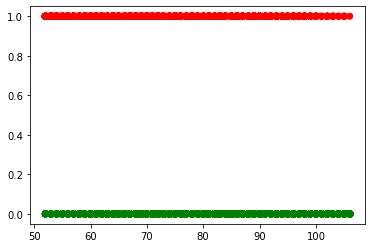

In [41]:
plt.scatter(final_df.weight, final_df.Class, color = colors)

age


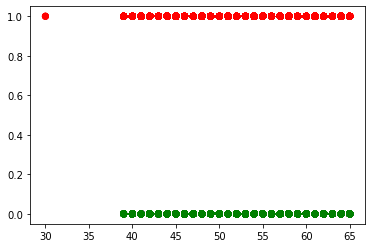

gender


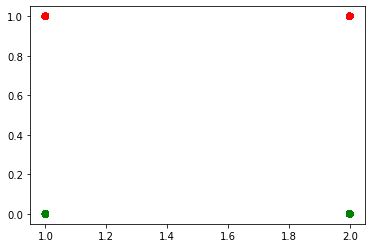

height


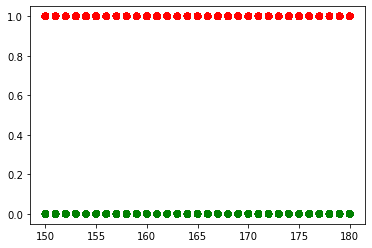

weight


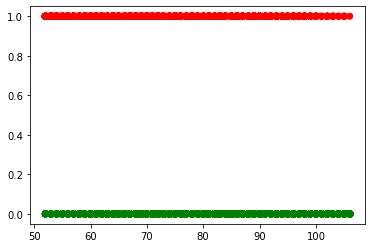

ap_hi


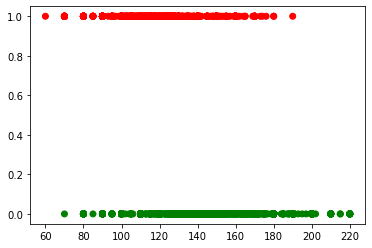

ap_lo


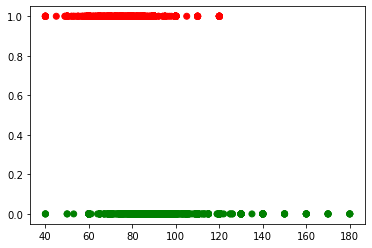

bmi


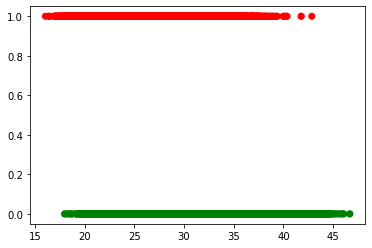

cholesterol


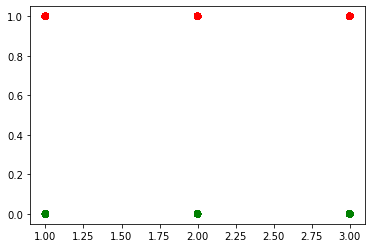

gluc


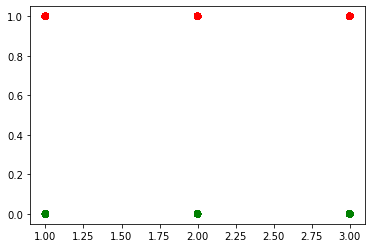

smoke


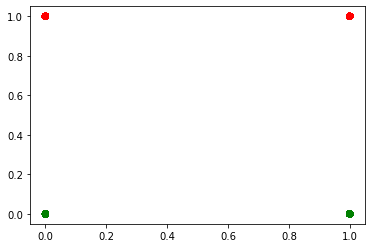

alco


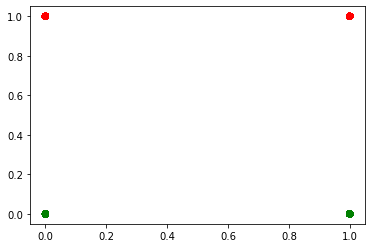

active


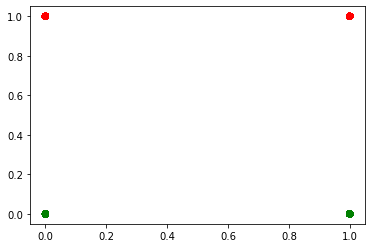

cardio


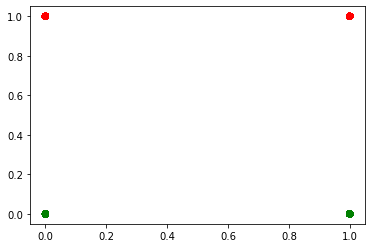

Class


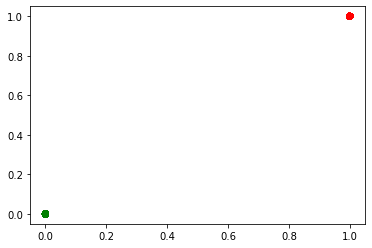

In [44]:
for col in final_df.columns:
    print(col)
    plt.scatter(final_df[col], final_df.Class, color = colors)
    plt.show()

In [25]:
import matplotlib.pyplot as plt

In [27]:
import matplotlib

In [18]:
# Exporting to DataBase